<a href="https://colab.research.google.com/github/VinniLP/Document-Similarity-Finding-using-BERT/blob/main/Document_Similarity_Finding_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#Approach 1**


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=87bcdb8306e3aa4e966eccf6bbb186348d6b10f7f73fcf00f6235e9e3cb5a433
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
sentences_a1 = [ 
    '''
 The moon is the largest natural satellite of the Earth and the fifth largest moon in the solar system. It is the only natural satellite of the Earth and is approximately one-quarter the size of Earth. The moon is believed to have formed from debris left over after a Mars-sized object collided with Earth. The moon's gravitational pull creates tides in the oceans, which affects the Earth's rotation and has a significant impact on life on Earth.
    '''
    ,
    '''
The sun is a star located at the center of the solar system. It is a huge ball of hot gas that provides light and heat to the planets that orbit around it. The sun is one of the most important sources of energy for life on Earth, and it has been studied by astronomers for thousands of years.
    '''
]


In [ ]:
from sentence_transformers import SentenceTransformer

model_name = 'sentence-transformers/bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

#Encoding:
sentences_embeddings_a1 = model.encode(sentences_a1)


In [ ]:
sentences_embeddings_a1.shape

(2, 768)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
similar_value_a1 = cosine_similarity(
    [sentences_embeddings_a1[0]],
    sentences_embeddings_a1[1:]
)

In [ ]:
print("Similarity Percentage = ",similar_value_a1[0][0]*100)

Similarity Percentage =  73.19702506065369


# **#Approach 2**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model_name_a2 = 'sentence-transformers/bert-base-nli-mean-tokens'
tokenizer = AutoTokenizer.from_pretrained(model_name_a2)
model_a2 = AutoModel.from_pretrained(model_name_a2)

In [ ]:
sentences_a2 = [ 
    '''
 The moon is the largest natural satellite of the Earth and the fifth largest moon in the solar system. It is the only natural satellite of the Earth and is approximately one-quarter the size of Earth. The moon is believed to have formed from debris left over after a Mars-sized object collided with Earth. The moon's gravitational pull creates tides in the oceans, which affects the Earth's rotation and has a significant impact on life on Earth.
    '''
    ,
    '''
The sun is a star located at the center of the solar system. It is a huge ball of hot gas that provides light and heat to the planets that orbit around it. The sun is one of the most important sources of energy for life on Earth, and it has been studied by astronomers for thousands of years.
    '''
]


In [ ]:
tokens_a2 = {'input_ids' : [],'attention_mask':[]}
for sentence in sentences_a2:
  new_tokens = tokenizer.encode_plus(sentence,max_length=128,truncation=True,padding='max_length',return_tensors='pt')
  tokens_a2['input_ids'].append(new_tokens['input_ids'][0])
  tokens_a2['attention_mask'].append(new_tokens['attention_mask'][0])

tokens_a2['input_ids'] = torch.stack(tokens_a2['input_ids'])
tokens_a2['attention_mask'] = torch.stack(tokens_a2['attention_mask'])

outputs_a2 = model_a2(**tokens_a2) 
outputs_a2.keys()

embeddings_a2 = outputs_a2.last_hidden_state
attention_a2 = tokens_a2['attention_mask']

mask_a2 = attention_a2.unsqueeze(-1).expand(embeddings_a2.shape).float()
mask_embeddings_a2 = embeddings_a2 * mask_a2

summed_a2 = torch.sum(mask_embeddings_a2,1)
counts_a2 = torch.clamp(mask_a2.sum(1),min=1e-9)

mean_pooled_a2 = summed_a2 / counts_a2
mean_pooled_a2 = mean_pooled_a2.detach().numpy()

similar_value_a2 = cosine_similarity(
  [mean_pooled_a2[0]],
  mean_pooled_a2[1:]
)

In [ ]:
print("Similarity Percentage = ",similar_value_a2[0][0]*100)

Similarity Percentage =  73.19702506065369


## **Heat Map**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk
import nltk
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
paras = [ 
    '''
 The moon is the largest natural satellite of the Earth and the fifth largest moon in the solar system. It is the only natural satellite of the Earth and is approximately one-quarter the size of Earth. The moon is believed to have formed from debris left over after a Mars-sized object collided with Earth. The moon's gravitational pull creates tides in the oceans, which affects the Earth's rotation and has a significant impact on life on Earth.
    '''
    ,
    '''
The sun is a star located at the center of the solar system. It is a huge ball of hot gas that provides light and heat to the planets that orbit around it. The sun is one of the most important sources of energy for life on Earth, and it has been studied by astronomers for thousands of years.
    '''
]


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model_name = 'sentence-transformers/bert-base-nli-mean-tokens'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [ ]:
from nltk.tokenize import sent_tokenize
sentences=["",""]
sentences[0] = sent_tokenize(paras[0])
sentences[1] = sent_tokenize(paras[1])

In [ ]:
def my_function_a3(sentences):
  tokens = {'input_ids' : [],'attention_mask':[]}
  for sentence in sentences:
    new_tokens = tokenizer.encode_plus(sentence,max_length=128,
                truncation=True,padding='max_length',return_tensors='pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0])
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

  tokens['input_ids'] = torch.stack(tokens['input_ids'])
  tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

  outputs = model(**tokens)
  # outputs.keys()

  embeddings = outputs.last_hidden_state
  embeddings.shape
  attention = tokens['attention_mask']

  mask = attention.unsqueeze(-1).expand(embeddings.shape).float()
  mask_embeddings = embeddings * mask

  summed = torch.sum(mask_embeddings,1)
  counts = torch.clamp(mask.sum(1),min=1e-9)

  mean_pooled = summed / counts
  mean_pooled = mean_pooled.detach().numpy()
   
  return mean_pooled

In [ ]:
s1 = my_function_a3(sentences[0])
s2 = my_function_a3(sentences[1])

In [ ]:
sentences_a2 = [ 
    '''
    The cat is a small carnivorous mammal. It is the most popular pet in the world, and is kept by millions of people. Cats are known for their soft fur, their ability to catch mice, and their independent personalities. They are affectionate animals and can be trained to perform a variety of tricks.
    '''
    ,
    '''
Dogs are man's best friend. They are loyal and obedient, and are known for their ability to be trained as service animals. They come in many different breeds, each with its own unique personality and characteristics. Dogs are playful and energetic, and are often used as therapy animals to help people who are struggling with emotional or physical challenges.
    '''
]

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
simm = np.zeros((len(s1),len(s2)))
for i in range(len(s1)):
  simm[i:,] = cosine_similarity(
    [s1[i]],
     s2[0:]
  )

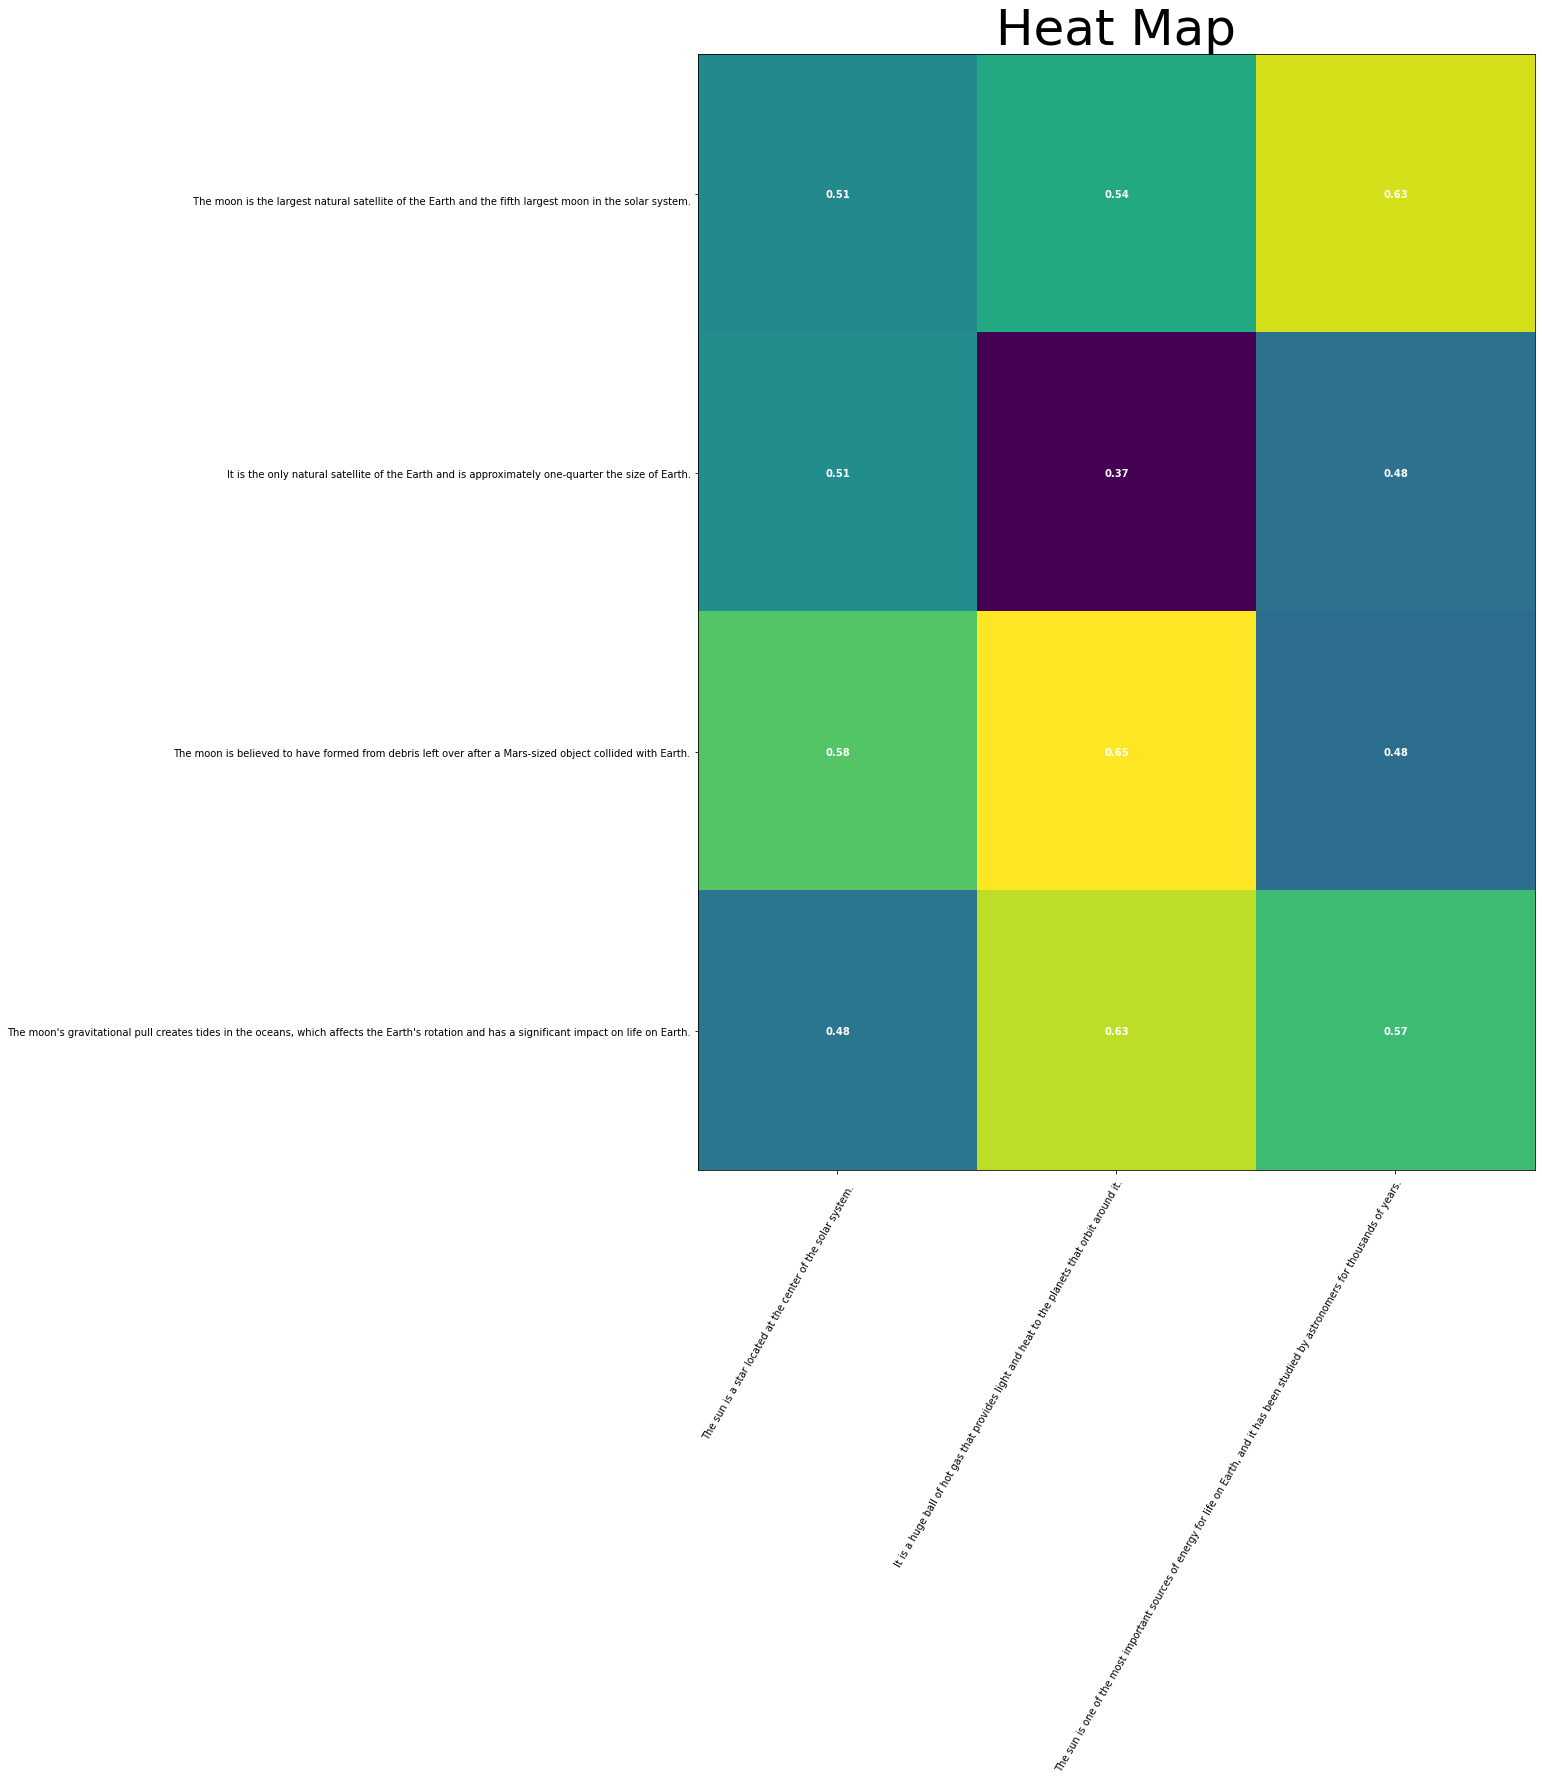

<Figure size 115200x57600 with 0 Axes>

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def new_figure(): 
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(simm)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(sentences[1])))
    ax.set_yticks(np.arange(len(sentences[0])))

    # ... and label them with the respective list entries
    ax.set_xticklabels(sentences[1])
    ax.set_yticklabels(sentences[0])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right",rotation_mode="anchor")

    for i in range(len(s1)):
        for j in range(len(s2)):
            text = ax.text(j, i,round(simm[i,j],2),ha="center",weight ='bold' ,va="center", color="w",fontsize=10)
            # text.set_visible(False)
    plt.figure(figsize = (1600,800))
    ax.set_title("Heat Map",fontsize=50)

    return fig
  
fig = new_figure()
fig.set_size_inches(15, 30)
# show_figure(fig)
plt.show()